We define the signal to noise ratio as
$$S/N = \frac{F A_\epsilon \tau}{\big( N_R^2 + \tau (F A_\epsilon + i_{DC} + F_\beta A_\epsilon \Omega)\big)^{1/2}}$$
where:
- $F$ is the flux from the target in $\gamma/s/m^2$
- $A_\epsilon$ is the effective area of the telescope
- $\tau$ is the integration time in $s$
- $N_R$ is the readout noise in $e^-$
- $i_{DC}$ is the detector dark current in $e^-/s$
- $F_\beta$ is the flux per solid angle from all background sources in $\gamma/s/m^2/st$
- $\Omega$ is the solid angle of a pixel in $st$


In [9]:
target_flux = 3500 # photons/s/m^2 for Mag 16 star in M2
area_effective = 0.036
integration_time = 100
noise_readout = 1
dark_current = 0.0022
background_flux = 2.6*10**12 # photons/s/m^2/st
pixel_solid_angle = 1.28*10**-11 # steradians for a 3.76 micometer pixel at 1.05 meter focal length

def snr(target_flux, area_effective, integration_time,
                          noise_readout, dark_current,
                          background_flux, pixel_solid_angle):
    """
    Calculate the signal-to-noise ratio (SNR) for an observation.

    Parameters:
    target_flux (float): Flux from the target source (photons/s/m^2).
    area_effective (float): Effective area of the telescope (m^2).
    integration_time (float): Integration time (s).
    noise_readout (float): Readout noise (electrons).
    dark_current (float): Dark current (electrons/s).
    background_flux (float): Background flux (photons/s/m^2/st).
    pixel_solid_angle (float): Solid angle of a pixel (st).

    Returns:
    float: The calculated signal-to-noise ratio.
    """
    # Signal calculation
    signal = target_flux * area_effective * integration_time

    # Noise calculation
    noise_background = background_flux * area_effective * integration_time * pixel_solid_angle
    noise_dark = dark_current * integration_time
    source_noise = signal
    total_noise = (source_noise + noise_background + noise_dark + noise_readout**2)**0.5

    snr = signal / total_noise
    return snr

result_snr = snr(target_flux, area_effective, integration_time,
                 noise_readout, dark_current,
                 background_flux, pixel_solid_angle)
print("Calculated SNR for 100 seconds integration time:", result_snr)

Calculated SNR for 100 seconds integration time: 111.71447292862386


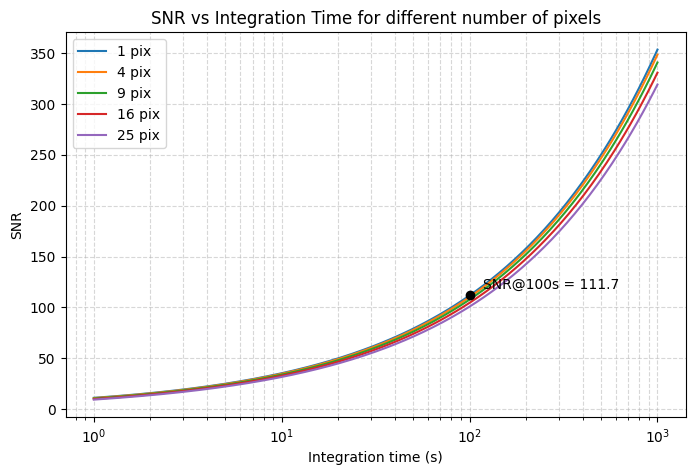

In [10]:
import numpy as np

import matplotlib.pyplot as plt

# use existing variables from the notebook:
# target_flux, area_effective, noise_readout, dark_current, background_flux, pixel_solid_angle

def snr_with_npix(target_flux, area_effective, integration_time,
                  noise_readout, dark_current,
                  background_flux, pixel_solid_angle, n_pix):
    signal = target_flux * area_effective * integration_time
    noise_background = background_flux * area_effective * integration_time * pixel_solid_angle * n_pix
    noise_dark = dark_current * integration_time * n_pix
    total_noise = np.sqrt(signal + noise_background + noise_dark + n_pix * noise_readout**2)
    return signal / total_noise

# integration time array (seconds)
times = np.logspace(0, 3, 300)  # 1 s to 1000 s

# different numbers of pixels over which the source is spread
n_pix_list = [1, 4, 9, 16, 25]

plt.figure(figsize=(8, 5))
for n_pix in n_pix_list:
    snr_vals = snr_with_npix(target_flux, area_effective, times,
                              noise_readout, dark_current,
                              background_flux, pixel_solid_angle, n_pix)
    plt.plot(times, snr_vals, label=f'{n_pix} pix')

# mark the existing 100 s result (assuming it corresponds to 1 pixel)
plt.scatter([integration_time], [result_snr], color='k', zorder=5)
plt.annotate(f"SNR@{integration_time}s = {result_snr:.1f}", (integration_time, result_snr),
             textcoords="offset points", xytext=(10,5))

plt.xscale('log')
plt.yscale('linear')
plt.xlabel('Integration time (s)')
plt.ylabel('SNR')
plt.title('SNR vs Integration Time for different number of pixels')
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.show()